$$
\begin{array}{c}
\textbf{CAUSAL INFERENCE - Fall 2025}\\\\
\textit{Center for Data Science, New York University} \\\\
\textit{December 05, 2025}\\\\
\text{ Prepared by: Vivek Kumar Agarwal}\\\\
\textbf{Recitation 12: Differences in Differences}\\\\
\end{array}
$$

---

![Causal Inference](../figures/CI_lab12_schematic_animated.gif)

---

## Today's Recitation 

- Quick Review
- Differences in Differences
- Lets Code!!

---

# Differences-in-Differences

## Section 1: Review of Causal Inference Methods

So far in this course, we've learned several methods for estimating causal effects. Today we'll add **Differences-in-Differences (DiD)** to our toolkit. As we review each method, let's understand what unique advantage DiD brings to the table.

---

### 1. Randomized Experiments

**What it does:** Random assignment ensures treatment and control groups are identical on average (in observed and unobserved characteristics).

**Key requirement:** Ability to randomize treatment assignment.

**Limitation:** Often infeasible (can't randomize state policies) or unethical (can't randomize access to healthcare).

**What DiD offers instead:** Works with observational data where treatment occurs naturally (policy changes, program rollouts). We don't need randomization—we use time variation and a control group.

**Example:** We can't randomly assign minimum wage increases to states, but we can compare states that raised minimum wage to those that didn't.

---

### 2. Regression with Control Variables

**What it does:** Controls for observed confounders that affect both treatment and outcome.

**Key requirement:** Selection on observables (conditional independence assumption). No unobserved confounders.

**Limitation:** If there are unobserved variables that affect both treatment and outcome, our estimate is biased.

**What DiD offers instead:** Allows for time-invariant unobserved confounders. DiD differences them out using the time dimension.

**Example:** States may differ in political culture, business environment, or other hard-to-measure factors. As long as these don't change over time, DiD removes them.

---

### 3. Instrumental Variables (IV)

**What it does:** Uses an instrument to isolate exogenous variation in treatment.

**Key requirement:** Valid instrument that satisfies relevance and exclusion restriction.

**Limitation:** Hard to find valid instruments in practice. Exclusion restriction is often questionable.

**What DiD offers instead:** Don't need an instrument—just need parallel trends assumption (treated and control would have followed same trend without treatment).

**Trade-off:** IV exploits specific exogenous variation; DiD exploits timing of treatment with parallel trends.

---

### 4. Regression Discontinuity Design (RDD)

**What it does:** Exploits discontinuous treatment assignment at a threshold.

**Key requirement:** Sharp discontinuity in treatment + continuity of potential outcomes at cutoff.

**Limitation:** Only applicable when treatment has a clear cutoff. Estimates local treatment effect at discontinuity.

**What DiD offers instead:** Works when treatment varies by group and time, no discontinuity needed. Estimates average treatment effect for treated group.

**Example:** Minimum wage changes don't have a sharp cutoff—they're policy decisions affecting entire states.

---

### 5. Matching Estimators

**What it does:** Creates comparable treatment and control groups by matching on observable characteristics.

**Key requirement:** Selection on observables + common support (overlap in covariate distributions).

**Limitation:** Same as regression—unobserved confounders still cause bias.

**What DiD offers instead:** Allows unobserved time-invariant differences between groups.

**Can combine methods:** DiD + matching can provide even stronger identification by ensuring parallel trends among matched units.

---

## When to Use DiD

DiD is useful when:

1. **Treatment is not randomly assigned** (observational data)
2. **Treatment varies across groups and time** (some units treated, others not; timing of treatment differs)
3. **Time-invariant unobserved confounders exist** (groups differ in ways we can't measure, but these differences are stable)
4. **Parallel trends is plausible** (without treatment, groups would follow similar trends)

---

**Key Takeaway:** DiD's superpower is using the time dimension to remove time-invariant confounders, even if they're unobserved. This makes it one of the most widely used methods in applied economics and policy evaluation.

---

## Section 2: Building Intuition - The Card-Krueger Study


### The Classic Example: Minimum Wage and Employment

In 1992, New Jersey raised its minimum wage from $4.25 to $5.05. Pennsylvania (neighboring state) did not. Economists David Card and Alan Krueger studied the effect on fast-food employment.

**Question:** Did the minimum wage increase reduce or increase employment?

**Why simple comparisons fail:**

1. **Compare NJ before vs after?** 
   - Maybe employment was rising everywhere due to economic expansion
   - Can't separate treatment effect from time trend

2. **Compare NJ vs PA in 1993?**
   - NJ and PA differ in many ways (economy, demographics, regulations)
   - Can't separate treatment effect from pre-existing differences

**The DiD Solution:**

Compare the *change* in NJ employment to the *change* in PA employment.

![Causal Inference](../figures/CI_lab12_image1.png)

**What we see:**
- **Before treatment (1991-1992):** Both states show parallel upward trends in employment
- **After treatment (1992-1993):** 
  - PA continues upward (blue line) - this is our counterfactual
  - NJ employment stays flat (red solid line) - this is what actually happened
  - The dashed line shows where NJ would have been without treatment

**The treatment effect:** The vertical gap between the dashed line (counterfactual) and solid line (actual) in 1993.

**Key insight:** PA shows us what *would have happened* to NJ without the minimum wage increase. This is the parallel trends assumption in action.

---

## Section 3: Formal DiD Framework

Now let's formalize what we just saw intuitively.

### The 2×2 DiD Setup

Consider the simplest DiD design with two groups and two time periods.

**Notation:**

Let $Y_{g,t}(S, U)$ represent observed outcomes, where:

$$\begin{aligned}
g &= \begin{cases}
1 & \text{if exposed to treatment } S \\
0 & \text{if not exposed}
\end{cases} \\[1em]
t &= \begin{cases}
1 & \text{post-treatment period} \\
0 & \text{pre-treatment period}
\end{cases} \\[1em]
S &= \begin{cases}
1 & \text{treatment applied} \\
0 & \text{no treatment}
\end{cases}
\end{aligned}$$

**What does this notation mean?**
- $g$ indexes groups: treated group ($g=1$) vs control group ($g=0$)
- $t$ indexes time: before ($t=0$) vs after ($t=1$) treatment
- $S$ is the treatment itself
- $U$ represents all other factors affecting the outcome

**Example mapping:**
- $Y_{1,1}(S=1, U)$: Employment in NJ (treated group) in 1993 (post-treatment) with minimum wage increase
- $Y_{0,1}(S=0, U)$: Employment in PA (control group) in 1993 (post-treatment) without minimum wage increase

### The DiD Idea

**Differences-in-Differences** estimates the causal effect by:

> Comparing **changes over time** ($t$) between a **treated group** ($g=1$) and a **control group** ($g=0$).

**Why "differences-in-differences"?**
1. **First difference:** Change over time for treated group
2. **Second difference:** Subtract the change over time for control group
3. What remains is the treatment effect

**Note:** This 2×2 DiD uses only two periods and two groups. We can extend to multiple time periods (which helps test parallel trends) and multiple groups, but we'll start with the simple case.

---

### Key Assumptions

#### 1. Parallel Trends Assumption (Critical!)

**In words:** In the absence of treatment, both groups would have followed similar trends over time.

**Formally:**
$$\mathbb{E}[Y_{1,1}(S=0, U) - Y_{1,0}(S=0, U)] = \mathbb{E}[Y_{0,1}(S=0, U) - Y_{0,0}(S=0, U)]$$

**What does this mean?**
- Left side: How the treated group's outcome would have changed without treatment
- Right side: How the control group's outcome actually changed
- Assumption: These two changes are equal

**Why is this critical?** This assumption lets us use the control group's trend as the counterfactual for the treated group.

**Can we test this?** Not directly (it's about counterfactuals), but we can check if trends were parallel in pre-treatment periods.

#### 2. No Spillover Effects

Treatment in one group must not influence outcomes in the other group.

**Example violation:** If NJ minimum wage increase caused workers to move from PA to NJ, PA employment would be affected even though PA didn't raise minimum wage.

---

### Estimating the Average Treatment Effect on the Treated (ATT)

Under the parallel trends assumption, we can estimate ATT in two equivalent ways:

#### Method 1: Difference-in-Means (Naïve DiD)

Compare the **change in outcomes for the treated group** to the **change for the control group**:

$$\begin{aligned}
\text{DiD} &= \underbrace{[\mathbb{E}[Y_{1,1}(S=1, U)] - \mathbb{E}[Y_{1,0}(S=0, U)]]}_{\text{Change in treated group}} \\
&\quad - \underbrace{[\mathbb{E}[Y_{0,1}(S=0, U)] - \mathbb{E}[Y_{0,0}(S=0, U)]]}_{\text{Change in control group}}
\end{aligned}$$

**Why this works:**
- First term: Actual change in treated group (includes treatment effect + time trend)
- Second term: Change in control group (only time trend, no treatment)
- Difference: Treatment effect (time trend cancels out)

**Key point:** All four terms are **observable** in the data! We can calculate sample means for each.

**Under parallel trends assumption:** $\text{DiD} = \text{ATT}$

(We'll prove this formally in class notes.)

#### Method 2: Regression-Based Estimation

We can estimate the same DiD using regression, which is more flexible for extensions.

**Define indicator variables:**

$$\begin{aligned}
G_i &= \begin{cases}
1 & \text{if unit } i \text{ is in treated group} \\
0 & \text{if unit } i \text{ is in control group}
\end{cases} \\[1em]
T_t &= \begin{cases}
1 & \text{if post-treatment period} \\
0 & \text{if pre-treatment period}
\end{cases} \\[1em]
D_{it} &= T_t \times G_i = \begin{cases}
1 & \text{if treated unit in post period} \\
0 & \text{otherwise}
\end{cases}
\end{aligned}$$

**The regression equation:**
$$Y_{it} = \beta_0 + \beta_1 T_t + \beta_2 G_i + \beta_3 (T_t \times G_i) + \epsilon_{it}$$

**Interpreting the coefficients:**
- $\beta_0$: Baseline outcome for control group in pre-period ($\mathbb{E}[Y_{0,0}]$)
- $\beta_1$: Time trend (change in control group from pre to post)
- $\beta_2$: Group difference (treated vs control in pre-period)
- $\beta_3$: **DiD estimate = ATT** (the interaction term!)

**Why $\beta_3$ is the DiD estimator:**

Let's write out the four group-time means from this regression:
- Control, pre-period: $\beta_0$
- Control, post-period: $\beta_0 + \beta_1$
- Treated, pre-period: $\beta_0 + \beta_2$
- Treated, post-period: $\beta_0 + \beta_1 + \beta_2 + \beta_3$

Now compute the DiD:
$$\begin{aligned}
\text{DiD} &= [\text{Treated post} - \text{Treated pre}] - [\text{Control post} - \text{Control pre}] \\
&= [(\beta_0 + \beta_1 + \beta_2 + \beta_3) - (\beta_0 + \beta_2)] - [(\beta_0 + \beta_1) - \beta_0] \\
&= [\beta_1 + \beta_3] - [\beta_1] \\
&= \beta_3
\end{aligned}$$

**So the interaction coefficient IS the DiD estimate!**

---

### Summary: Two Ways, Same Answer

Both methods give the same DiD estimate under the 2×2 setup:
1. **Manual calculation:** Compute four group-time means, take differences
2. **Regression:** Run OLS with group, time, and interaction dummies

The regression approach is more flexible for:
- Adding control variables
- Extending to multiple time periods
- Computing standard errors with clustering
- Visualizing with event studies

Next, we'll implement both methods with real data.

---

## Setting up the problem and code: Do increases in the minimum wage affect employment?

---

## Section 4: Calculating DiD - Manual Approach

Now let's implement Differences-in-Differences with real data. We'll start by calculating it manually using the 2×2 framework, then verify with regression.

### Loading and Exploring the Data

---

In [8]:

import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv("../data/DID_Example.csv")
df.columns = df.columns.str.replace('.', '_', regex=False)
df['Time'] = df['Treatment']

# Look at the structure
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (820, 16)

First few rows:


,ID,Chain,SouthJ,CentralJ,NorthJ,PA1,PA2,Shore,Group,Empl,C_Owned,Hours_Opening,Soda,Fries,Treatment,Time
0,46,1,0,0,0,1,0,0,0,30.0,0,16.5,1.03,1.03,0,0
1,49,2,0,0,0,1,0,0,0,6.5,0,13.0,1.01,0.90,0,0
2,506,2,0,0,0,1,0,0,0,3.0,1,10.0,0.95,0.74,0,0
3,56,4,0,0,0,1,0,0,0,20.0,1,12.0,0.87,0.82,0,0
4,61,4,0,0,0,1,0,0,0,6.0,1,12.0,0.87,0.77,0,0


In [9]:

# What variables do we have?
df.columns

Index(['ID', 'Chain', 'SouthJ', 'CentralJ', 'NorthJ', 'PA1', 'PA2', 'Shore',
       'Group', 'Empl', 'C_Owned', 'Hours_Opening', 'Soda', 'Fries',
       'Treatment', 'Time'],
      dtype='object')

In [10]:

# Check the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             820 non-null    int64  
 1   Chain          820 non-null    int64  
 2   SouthJ         820 non-null    int64  
 3   CentralJ       820 non-null    int64  
 4   NorthJ         820 non-null    int64  
 5   PA1            820 non-null    int64  
 6   PA2            820 non-null    int64  
 7   Shore          820 non-null    int64  
 8   Group          820 non-null    int64  
 9   Empl           802 non-null    float64
 10  C_Owned        820 non-null    int64  
 11  Hours_Opening  820 non-null    float64
 12  Soda           790 non-null    float64
 13  Fries          775 non-null    float64
 14  Treatment      820 non-null    int64  
 15  Time           820 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 102.6 KB


In [11]:

# How many observations in each group?
print("Group distribution:")
print(df['Group'].value_counts())

Group distribution:
1    662
0    158
Name: Group, dtype: int64


In [13]:

df['Time'].value_counts()
print("\nGroup-Time combinations:")
df.groupby(['Time', 'Group']).size().reset_index(name='Counts')


Group-Time combinations:


,Time,Group,Counts
0,0,0,79
1,0,1,331
2,1,0,79
3,1,1,331


---


### The 2×2 Table: Computing Group-Time Means

Recall our DiD formula requires four means:
- Control group, pre-period: $\mathbb{E}[Y_{0,0}]$
- Control group, post-period: $\mathbb{E}[Y_{0,1}]$
- Treated group, pre-period: $\mathbb{E}[Y_{1,0}]$
- Treated group, post-period: $\mathbb{E}[Y_{1,1}]$


---



### Solution?

+ Compare how the difference in employment before and after 1992 differs b/w NJ and PA?
$$\text{DiD} = \big(\mathbb{E}\big[\text{Employ.}|\text{NJ}, \text{Post-92}\big]-\mathbb{E}\big[\text{Employ.}|\text{NJ}, \text{Pre-92}\big]\big) - \big(\mathbb{E}\big[\text{Employ.}|\text{PA}, \text{Post-92}\big] - \mathbb{E}\big[\text{Employ.}|\text{PA}, \text{Pre-92}\big]]\big)$$

  + Assuming that if NJ had not increased its minimum wage, its employment would have evolved the same way as PA's.


In [15]:
summary = df.pivot_table(index="Group", columns="Time", values="Empl")
nj_diff = summary.loc[1, 1] - summary.loc[1, 0]
pa_diff = summary.loc[0, 1] - summary.loc[0, 0]
did_estimate = nj_diff - pa_diff
print("Difference-in-Differences Estimate:", did_estimate)

Difference-in-Differences Estimate: 3.3617496258686552


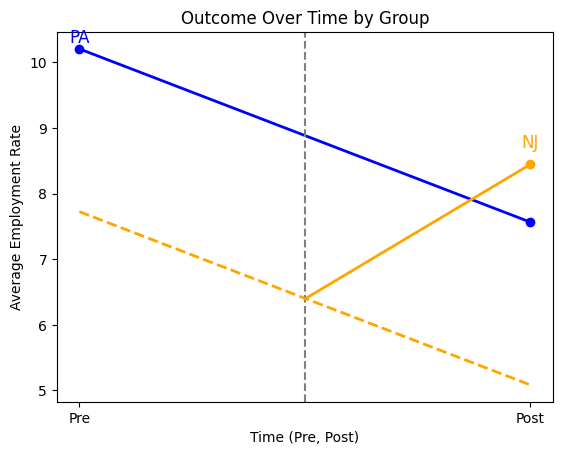

In [ ]:
import matplotlib.pyplot as plt

# Compute group means
group_means = df.groupby(['Time', 'Group'])['Empl'].mean().reset_index()

group_0 = group_means[group_means['Group'] == 0]
group_1 = group_means[group_means['Group'] == 1]

pre_treatment_group_0 = group_0[group_0['Time'] == 0]['Empl'].values[0]
pre_treatment_group_1 = group_1[group_1['Time'] == 0]['Empl'].values[0]

trend_diff = pre_treatment_group_1 - pre_treatment_group_0

parallel_group_1 = group_0.copy()
parallel_group_1['Empl'] = parallel_group_1['Empl'] + trend_diff

post_treatment_group_1 = group_1[group_1['Time'] >= 0.5]

parallel_at_0_5 = (summary.loc[0, 1] - summary.loc[0, 0] + 0.3) / 2 + summary.loc[0, 1]

actual_post_treatment_group_1 = post_treatment_group_1[post_treatment_group_1['Time'] == 1]['Empl'].values[0]

plt.plot(group_0['Time'], group_0['Empl'], marker='o', color='blue', linewidth=2)

plt.plot(parallel_group_1['Time'], parallel_group_1['Empl'], linestyle='--', color='orange', linewidth=2)

plt.plot(post_treatment_group_1['Time'], post_treatment_group_1['Empl'], marker='o', color='orange', linewidth=2)

plt.axvline(x=0.5, color='gray', linestyle='--')

plt.plot([0.5, 1], [parallel_at_0_5, actual_post_treatment_group_1], linestyle='-', color='orange', linewidth=2)

plt.title("Outcome Over Time by Group")
plt.xlabel("Time (Pre, Post)")
plt.ylabel("Average Employment Rate")

plt.xticks([0, 1], ['Pre', 'Post'])

plt.text(1, parallel_at_0_5 +2.3, "NJ", color='orange', fontsize=12, ha='center')

plt.text(0, pre_treatment_group_0 + 0.1, "PA", color='blue', fontsize=12, ha='center')

plt.show()



---

### Regression estimation


As shown above, we could also frame our problme in terms of a regression problem, where:

1. **Group variable ($G$)**:  
   $$
   G =
   \begin{cases}
   1 & \text{if restaurant is in NJ (treatment group)} \\
   0 & \text{if restaurant is in PA (control group)}
   \end{cases}
   $$
2. **Time variable ($T$)**:  
   $$
   T =
   \begin{cases}
   1 & \text{if after the minimum wage increase in NJ (post-treatment)} \\
   0 & \text{if before the minimum wage increase in NJ (pre-treatment)}
   \end{cases}
   $$

3. **Interaction term ($D$)**:  

   $$
   D = G \times T =
   \begin{cases}
   1 & \text{if the restaurant is in NJ after the wage increase (treated group, post-treatment)} \\
   0 & \text{otherwise}
   \end{cases}
   $$

Leading to:
$$
Y = \beta_0 + \beta_1 T + \beta_2 G + \beta_3 (T \times G) + \epsilon
$$


In [18]:
import statsmodels.formula.api as smf

# Run regression
model = smf.ols("Empl ~ Group + Time + Group*Time", data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Empl   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.122
Date:                Fri, 05 Dec 2025   Prob (F-statistic):             0.0959
Time:                        02:42:16   Log-Likelihood:                -2831.4
No. Observations:                 802   AIC:                             5671.
Df Residuals:                     798   BIC:                             5690.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2051      0.938     10.883      0.0

---

#### Regardless of the method, we find that the minimum wage increase cause NJ fast food branches to increase employment by 3.36.


---

## DiD with Control Variables

Our baseline DiD assumes parallel trends unconditionally. But we can improve precision (reduce standard errors) and make parallel trends more plausible by adding control variables.

### Why Add Controls?

**Two main reasons:**

1. **Improve precision:** Controls absorb variation in the outcome, reducing residual variance and standard errors

2. **Conditional parallel trends:** Maybe trends are only parallel after accounting for differences in restaurant characteristics (ownership, location, menu prices, etc.)

**The modified DiD regression:**
$$Y_{it} = \beta_0 + \beta_1 \text{Time}_t + \beta_2 \text{Group}_i + \beta_3 (\text{Time}_t \times \text{Group}_i) + \mathbf{X}_{it}'\boldsymbol{\gamma} + \epsilon_{it}$$

Where $\mathbf{X}_{it}$ includes control variables like restaurant ownership, hours, location, menu prices, etc.

**Key point:** $\beta_3$ is still our DiD estimate, but now it's conditional on these controls.

---

In [20]:
formula = """
Empl ~ Group + Treatment +
Treatment * Group + C_Owned +
Hours_Opening + Soda +
         Fries +
         C(Chain) +
         SouthJ +
         CentralJ +
         NorthJ +
         PA1 +
         PA2 +
         Shore
"""

reg = smf.ols(formula=formula, data=df).fit()

reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Empl   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     7.670
Date:                Fri, 05 Dec 2025   Prob (F-statistic):           2.94e-15
Time:                        02:48:16   Log-Likelihood:                -2608.8
No. Observations:                 757   AIC:                             5248.
Df Residuals:                     742   BIC:                             5317.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.3236      3.414     -0.095      0.925      -7.025       6.378
C(Chain)[T.2]      -0.5951      1.089     -0.546      0.585      -2.733       1.543
C(Chain)[T.3]      -1.7984      0.907     -1.982      0.048      -3.580      -0.017
C(Chain)[T.4]       2.2299      1.055      2.114      0.035       0.160       4.300
Group              -1.7994      1.195     -1.505      0.133      -4.146       0.547
Treatment          -1.3162      1.293     -1.018      0.309      -3.855       1.223
Treatment:Group     4.1237      1.414      2.917      0.004       1.348       6.899
C_Owned            -0.1287      0.681     -0.189      0.850      -1.466       1.208
Hours_Opening       0.5499      0.099      5.579      0.000       0.356       0.743
Soda                2.7274      4.260      0.640      0.522      -5.635      11.090
Fries              -0.6461      4.065     -0.159      0.874      -8.627       7.335
SouthJ             -1.7821      0.561     -3.176      0.002      -2.884      -0.681
CentralJ           -0.6918      0.699     -0.989      0.323      -2.065       0.681
NorthJ              0.6744      0.679      0.994      0.321      -0.658       2.007
PA1                -0.4646      1.381     -0.336      0.737      -3.175       2.246
PA2                 1.9404      1.380      1.406      0.160      -0.769       4.650
Shore               0.8405      1.047      0.803      0.422      -1.214       2.895
==============================================================================
Omnibus:                      152.622   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.331
Skew:                           1.181   Prob(JB):                     1.81e-62
Kurtosis:                       4.855   Cond. No.                     1.43e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  7e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
### Comparing Models: With and Without Controls

# Extract key statistics from both models
comparison = pd.DataFrame({
    'Model': ['Without Controls', 'With Controls'],
    'DiD Estimate (β₃)': [
        model.params['Group:Time'],
        reg.params['Treatment:Group']
    ],
    'Standard Error': [
        model.bse['Group:Time'],
        reg.bse['Treatment:Group']
    ],
    'p-value': [
        model.pvalues['Group:Time'],
        reg.pvalues['Treatment:Group']
    ],
    'R-squared': [
        model.rsquared,
        reg.rsquared
    ]
})

print("\nModel Comparison:")
print(comparison.to_string(index=False))


Model Comparison:
           Model  DiD Estimate (β₃)  Standard Error  p-value  R-squared
Without Controls            3.36175        1.481200 0.023497   0.007916
   With Controls            4.12365        1.413734 0.003643   0.126416


In [22]:
# Calculate confidence intervals for both
ci_baseline = model.conf_int().loc['Group:Time']
ci_controls = reg.conf_int().loc['Treatment:Group']

print(f"\n95% Confidence Intervals:")
print(f"Without Controls: [{ci_baseline[0]:.3f}, {ci_baseline[1]:.3f}]")
print(f"With Controls:    [{ci_controls[0]:.3f}, {ci_controls[1]:.3f}]")


95% Confidence Intervals:
Without Controls: [0.454, 6.269]
With Controls:    [1.348, 6.899]


**What do these controls capture?**
- **C_Owned**: Company-owned vs franchise
- **Hours_Opening**: Operating hours
- **Soda, Fries**: Menu prices (proxy for restaurant quality/market)
- **C(Chain)**: Chain fixed effects (Burger King, KFC, etc.)
- **Location dummies**: SouthJ, CentralJ, NorthJ, PA1, PA2, Shore (geographic differences)


In [23]:
# Interpretation: Did Adding Controls Matter?
# Calculate the change in the DiD estimate
baseline_did = model.params['Group:Time']
controlled_did = reg.params['Treatment:Group']
change = controlled_did - baseline_did
pct_change = (change / baseline_did) * 100

print(f"\nImpact of Adding Controls:")
print(f"Baseline DiD:        {baseline_did:.3f}")
print(f"Controlled DiD:      {controlled_did:.3f}")
print(f"Change:              {change:.3f} ({pct_change:.1f}%)")

# Check if significance changed
baseline_sig = model.pvalues['Group:Time'] < 0.05
controlled_sig = reg.pvalues['Treatment:Group'] < 0.05

print(f"\nStatistical Significance:")
print(f"Baseline:  {'Significant' if baseline_sig else 'Not significant'} (p={model.pvalues['Group:Time']:.4f})")
print(f"Controlled: {'Significant' if controlled_sig else 'Not significant'} (p={reg.pvalues['Treatment:Group']:.4f})")


Impact of Adding Controls:
Baseline DiD:        3.362
Controlled DiD:      4.124
Change:              0.762 (22.7%)

Statistical Significance:
Baseline:  Significant (p=0.0235)
Controlled: Significant (p=0.0036)


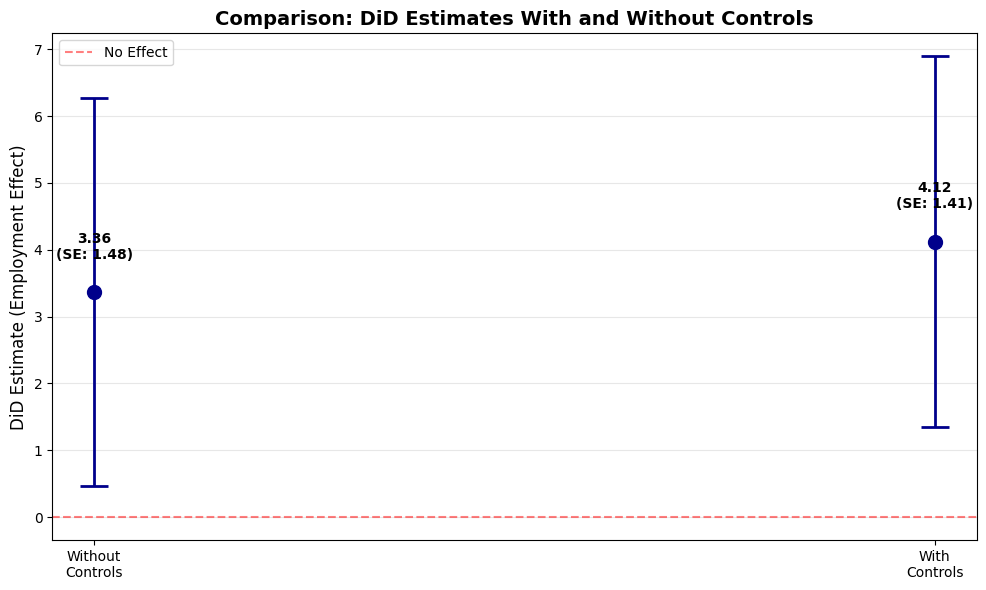

In [24]:
# Create comparison plot
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Without\nControls', 'With\nControls']
estimates = [baseline_did, controlled_did]
errors = [model.bse['Group:Time'], reg.bse['Treatment:Group']]

# Plot point estimates with error bars
ax.errorbar(models, estimates, yerr=[1.96*e for e in errors], 
            fmt='o', markersize=10, capsize=10, capthick=2, linewidth=2,
            color='darkblue', ecolor='darkblue')

# Add horizontal line at zero
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='No Effect')

# Add value labels
for i, (est, se) in enumerate(zip(estimates, errors)):
    ax.text(i, est + 0.5, f'{est:.2f}\n(SE: {se:.2f})', 
            ha='center', fontsize=10, fontweight='bold')

ax.set_ylabel('DiD Estimate (Employment Effect)', fontsize=12)
ax.set_title('Comparison: DiD Estimates With and Without Controls', 
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

---

### Assumptions of DID??

### Does the Parallel Trends Hold?

1. Are the treated and untreated groups fundamentally “similar”?
2. Why did the treated group get the treatment (and why didn’t
the untreated group)?
3. Was the treatment event anticipated by the treated group?
4. Were there parallel trends in the pre-period?

---

#### Fallback
What if the Parallel Trends Assumption Does Not Hold? (We reject the parallel trends assumption)
1. matching/synthetic control method (weighted control groups to mimic the treated group)
2. Regression Discontinuity Design (RDD)
3. Instrumental Variables (IV)

---

### Time Varying Treatment Effects


Are the effects varying? Meaning the minimum wage increase on employment varies over time, initially increasing employment but eventually decreasing as firms substitute workers with machines?

Our model can capture this dynamic with multiple time periods $t$:

$$
Y_{g, t} = \sum_{i=-\underline{t}}^{\bar{t}} \beta_i T_i + \gamma G + \sum_{j=0}^{\bar{t}} \alpha_j D_j \\
\alpha_j = A T T_j
$$

- $\beta_i$ captures general time trends
- $\gamma$ represents the difference between treated and untreated groups.
- $\alpha_j$ estimates the time-varying Average Treatment Effects on the Treated (ATTs).


---



**References:**

+ Tutorials:
  + https://rpubs.com/phle/r_tutorial_difference_in_differences
  +  https://bookdown.org/cuborican/RE_STAT/difference-in-differences.html
  + https://diff.healthpolicydatascience.org

+ Card, David and Alan B. Krueger. 1994. “Minimum Wages
and Employment: A Case Study of the Fast-Food Industry in
New Jersey and Pennsylvania.” The American Economic
Review 84 (4): 772-793.
https://www.jstor.org/stable/2677856.

+ Sah, Sidharth. Causal Inference: Difference-in-Differences. 2025. PowerPoint presentation.

---

### Office Hours Monday 3PM - 4PM on Zoom or dropin your questions at vka244@nyu.edu 

Discuss Questions for Finals

# Best of Luck for Finals

---